# **Finetune Gemma 7B LLM with Hugging Face AutoTrain**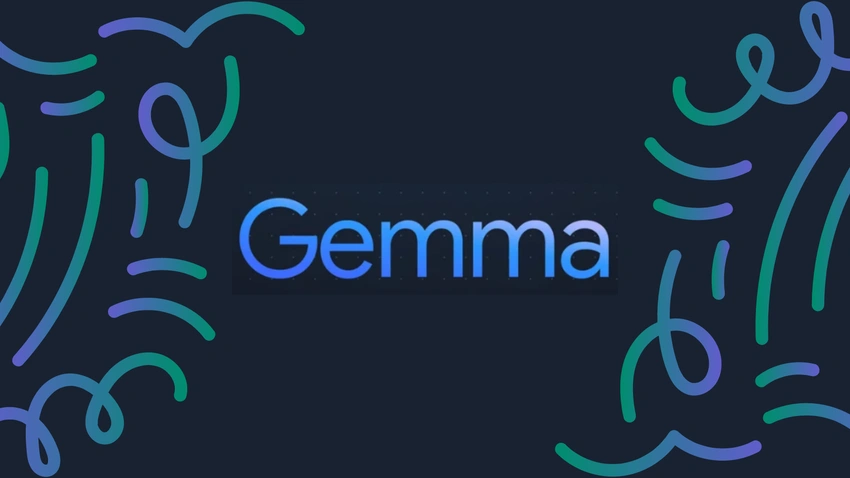

In the dynamic realm of artificial intelligence, Google introduces Gemma, a cutting-edge open-source language model poised for versatile applications. This tutorial delves into the fine-tuning process of Gemma, enriching its capabilities with data sourced from UBIAI. Leveraging the collaborative power of Gemma and UBIAI, this tutorial demonstrates a strategic approach to enhance the model's performance, making it a robust solution for responsible AI development.

**The Gemma Lineup: 2B and 7B Models**

Released in two sizes – Gemma 2B and Gemma 7B – Google aims to redefine the role of AI in various domains, from small work-based tasks like chatbots to more complex applications such as data analysis. Unlike its heavyweight counterparts, Gemma is designed to operate efficiently on a laptop, workstation, or within the Google Cloud ecosystem.

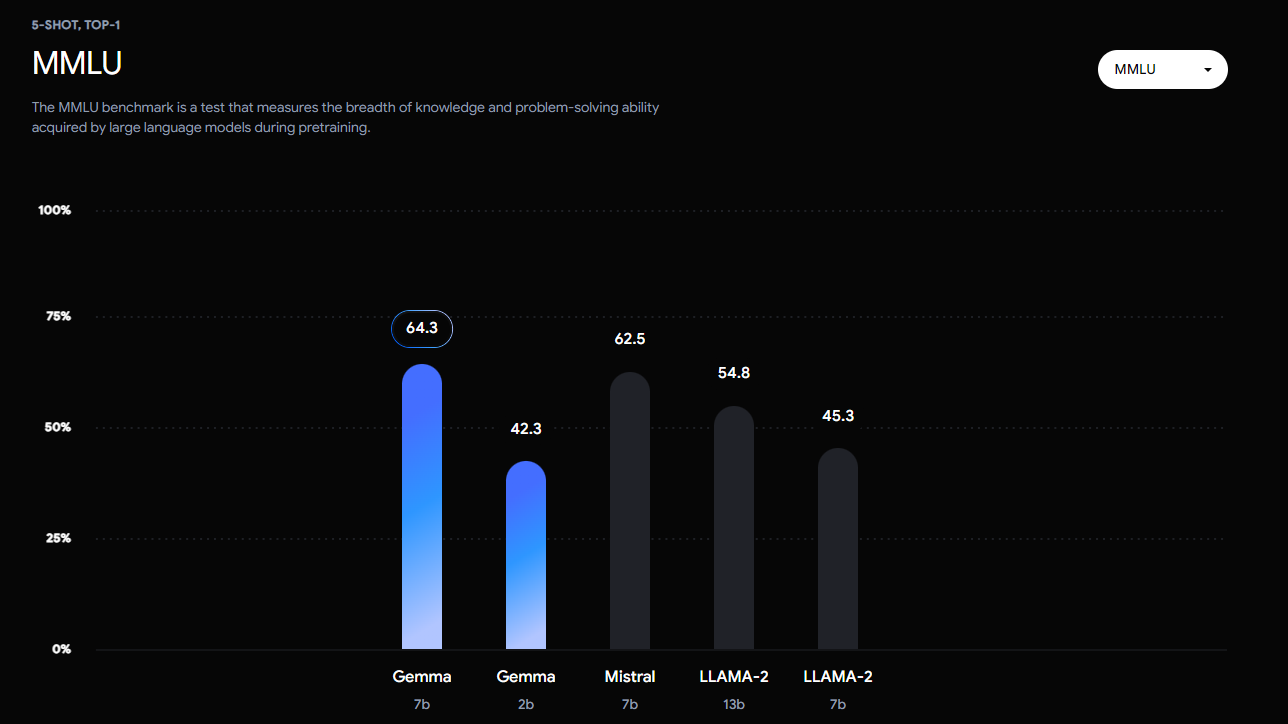

**Unraveling the Gemma Architecture**

Gemma's standout performance in its size category is attributed to several key design choices. The model boasts a substantial vocabulary size of 256,000 words, dwarfing competitors like Llama 2 with a 32,000-word vocabulary. Furthermore, Gemma's training on a colossal 6 trillion token dataset sets it apart from the resource requirements of its counterparts.

Delving into its architecture, Gemma showcases a resemblance to the Gemini models, particularly in the utilization of Nvidia GPUs for optimization. The collaboration with Nvidia ensures industry-leading performance from data centers to the cloud, aligning with Google's commitment to accessibility in AI.

**Gemma Meets the Open-Source Community**

Google's commitment to ethical AI is exemplified through Gemma's release as an open-source model. Developers and researchers can access Gemma's full architecture, training methodology, and model parameters under permissible licenses. This transparency not only fosters collaboration but also allows external scrutiny, reinforcing accountability in AI development.

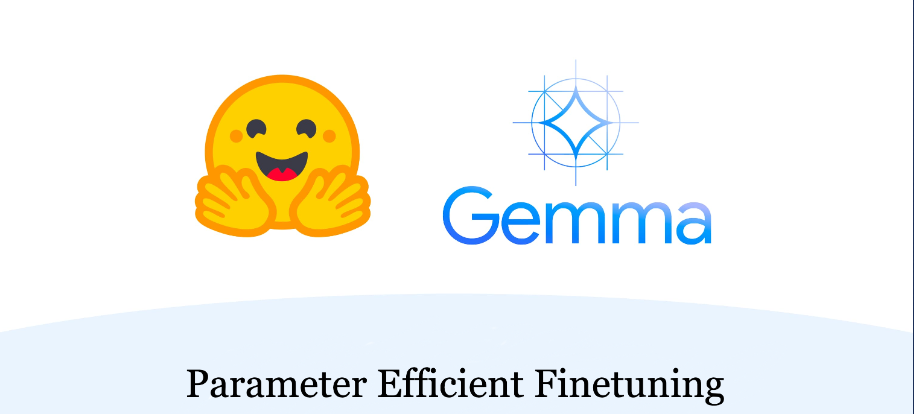

**Fine-Tuning Gemma: Unlocking the Full Potential**

Fine-tuning Gemma stands as a crucial gateway to unleashing the true power and adaptability of this revolutionary AI model. While Gemma arrives pre-trained with impressive capabilities, fine-tuning allows developers to tailor the model to specific applications and nuances, optimizing its performance for diverse tasks. The ability to fine-tune Gemma opens avenues for customization, enabling developers to address domain-specific challenges and improve model outcomes. Whether it's enhancing conversational nuances in chatbots or refining data analysis for intricate business needs, the fine-tuning process empowers developers to mold Gemma into a versatile tool that aligns precisely with their objectives.

**Environment and Dataset Preparation**

To fine-tune the LLM with Python API, we need to install the Python package, which you can run using the following code.

In [ ]:
!pip install pandas autotrain-advanced -q

**Refining the Training Data Structure for Gemma Fine-Tuning with UBIAI Data**
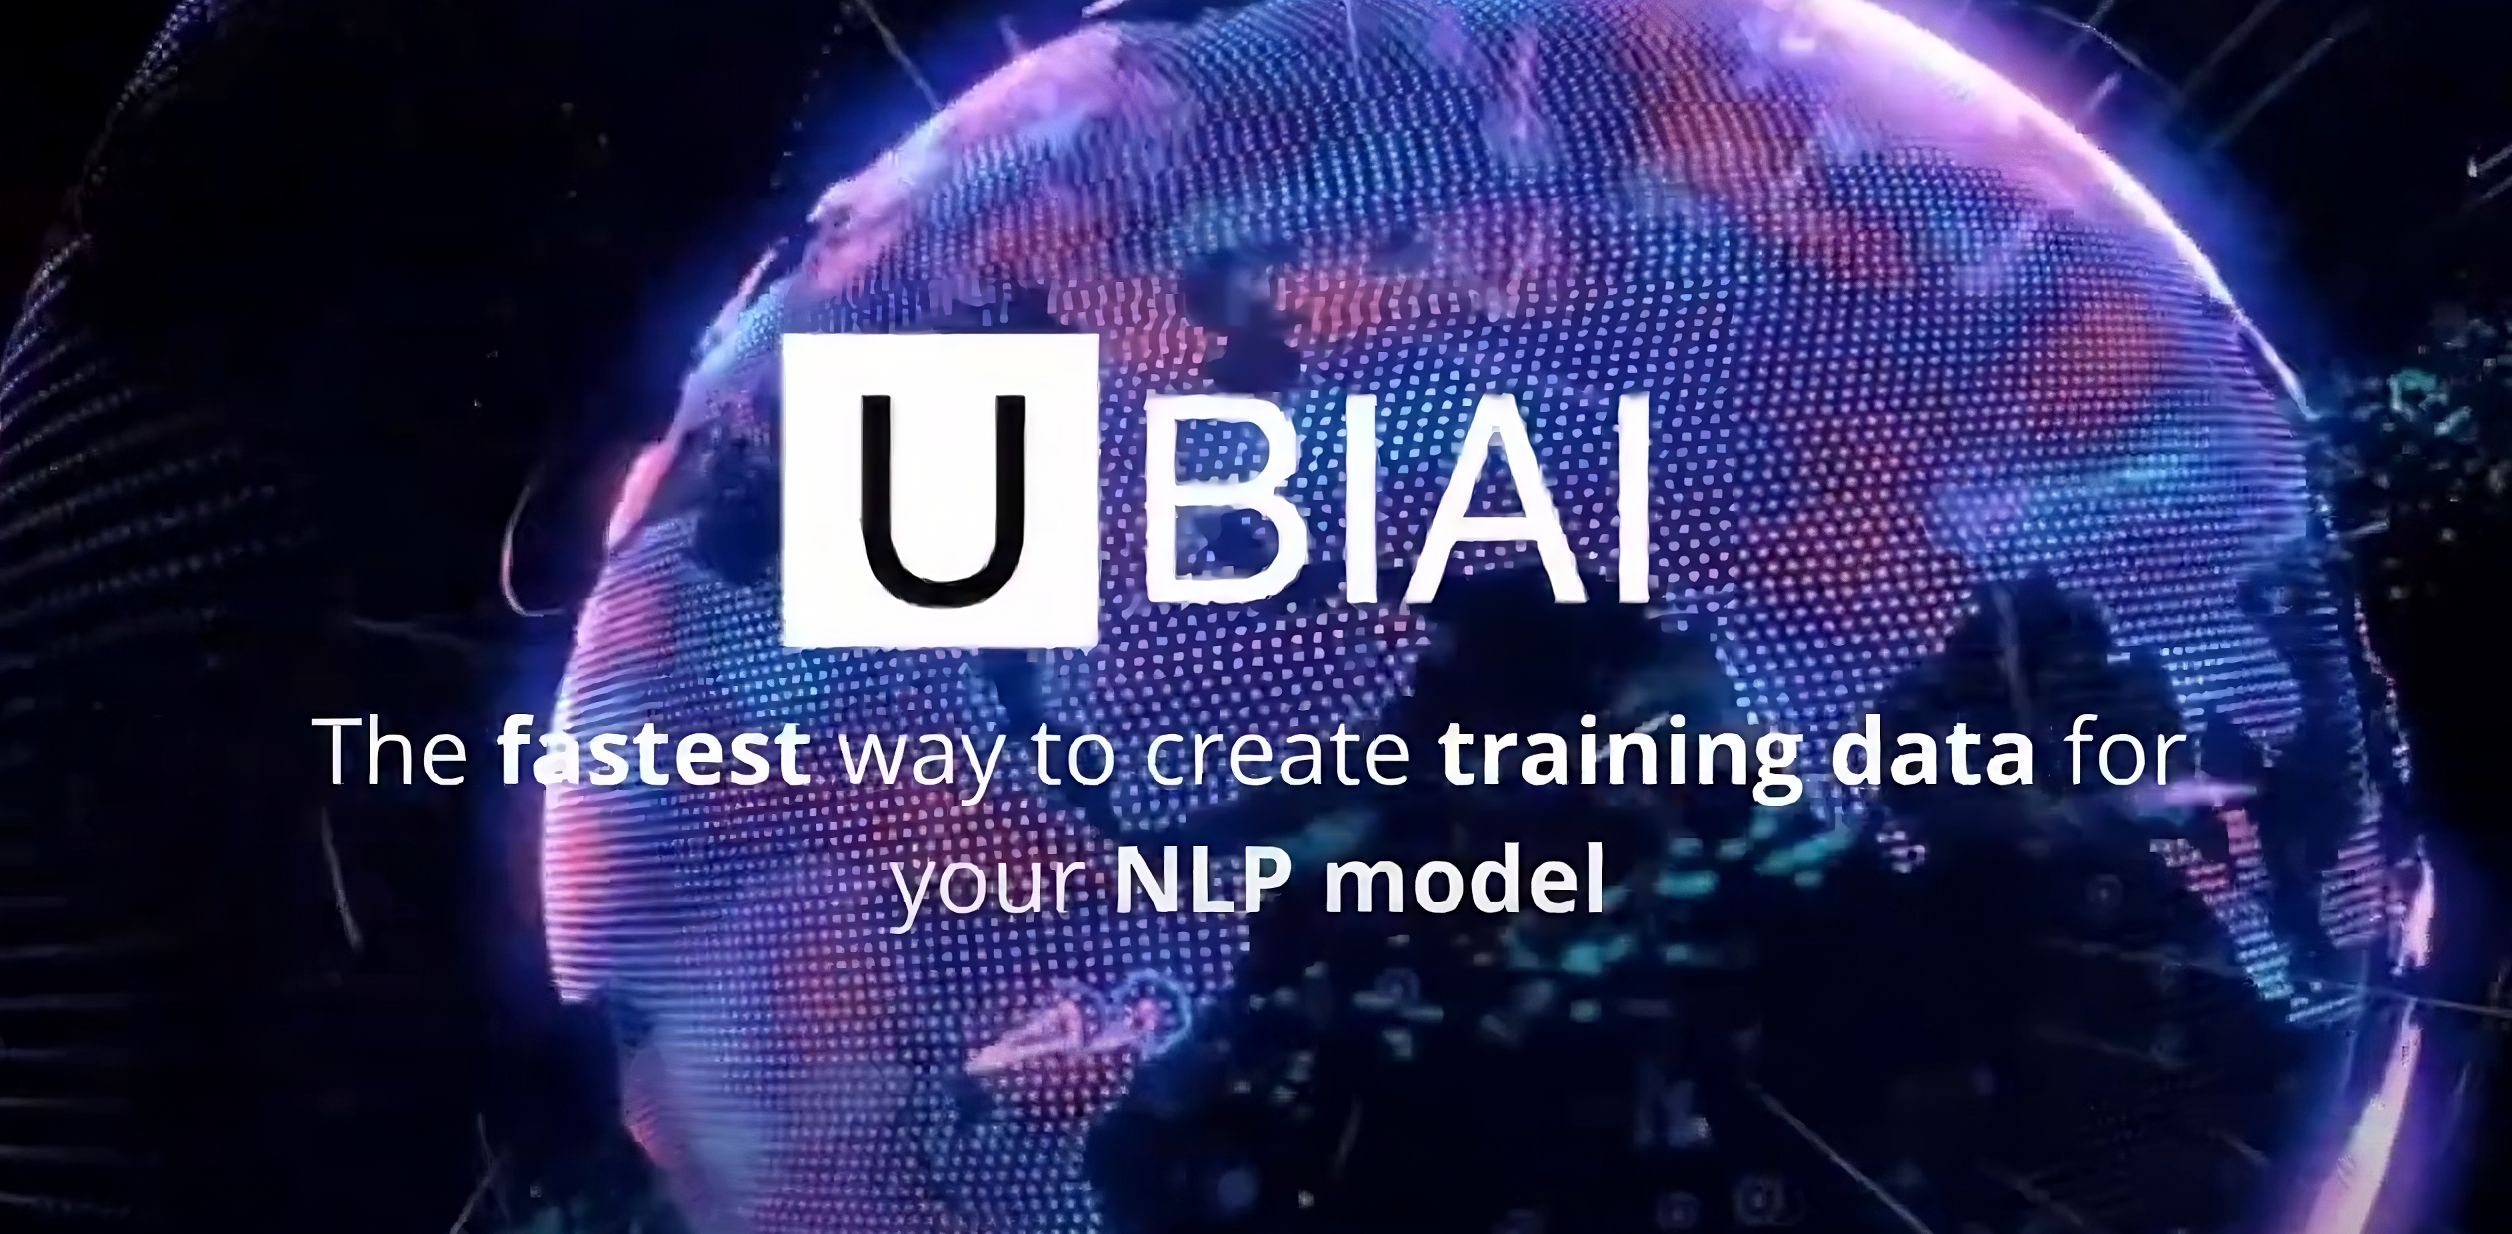
In the process of fine-tuning Gemma for enhanced performance, meticulous structuring of the training data becomes pivotal. Our approach involves integrating UBIAI data, specifically focusing on tables and their summarization capabilities. The dataset's structure plays a crucial role in shaping Gemma's adaptability to this unique domain.

Consequently, the training data is curated to feature conversational turns within a well-defined format. This format is characterized by markers that distinctly delineate between user inputs and model responses. Here, we draw inspiration from UBIAI's rich dataset, ensuring that the integration aligns seamlessly with Gemma's objective of table summarization. Each exchange is framed by <start_of_turn> and <end_of_turn> markers, demarcating user and model inputs. Consider the following exemplars:


**Input Table:**

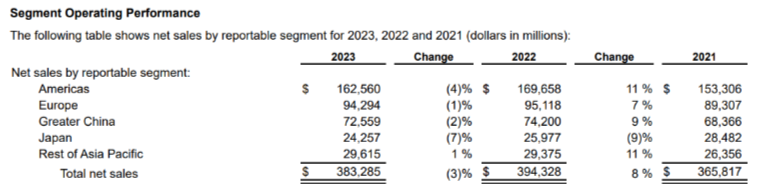

**Summary**

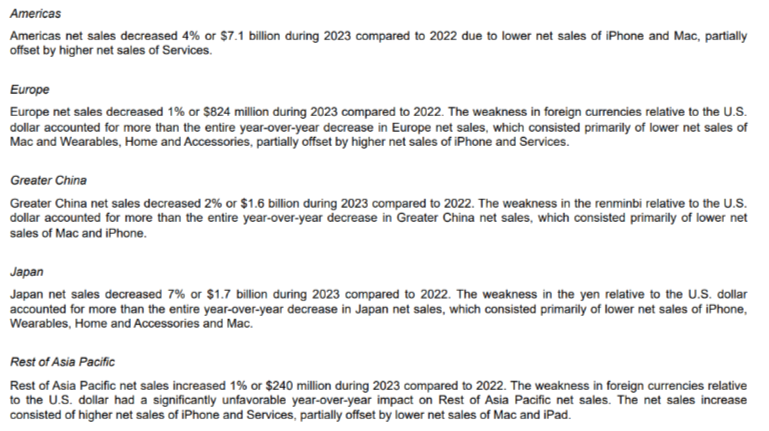

In [ ]:
("""<start_of_turn>user\n	Summarize this table :
2023	Change	2022	Change	2021
Net sales by reportable segment
Americas	$ 162,560	(4)%	$ 169,658	11 %	$ 153,306
Europe	94,294	(1)%	95,118	7 %	89,307
Greater China	72,559	(2)%	74,200	9 %	68,366
Japan	24,257	(7)%	25,977	(9)%	28,482
Rest of Asia Pacific	29,615	1 %	29,375	11 % 0	26,356
Total net sales	$ 383,285	(3)%	$ 394,328	8 %	$ 365,817

Net sales by category:
iPhone (1)	$ 200,583	(2)%	$ 205,489	7 %	$ 191,973
Mac (1)	29,357	(27)%	40,177	14 %	35,190
iPad (1)	28,300	(3)%	29,292	(8)%	31,862
Wearables, Home and Accessories (1)	39,845	(3)%	41,241	7 %	38,367
Services (2)	85,200	9 %	78,129	14 %	68,425
Total net sales	$ 383,285	(3)%	$ 394,328	8 %	$ 365,817

Research and development	$ 29,915	14 %	$ 26,251	20 %	$ 21,914
Percentage of total net sales	8 %		7 %		6 %
Selling, general and administrative	$ 24,932	(1)%	$ 25,094	14 %	$ 21,973
Percentage of total net sales	7 %		6 %		6 %
Total operating expenses	$ 54,847	7 %	$ 51,345	17 %	$ 43,887
Percentage of total net sales	14 %		13 %		12 %<end_of_turn>
 <start_of_turn>model\nAmericas Americas net sales decreased 4% or $7.1 billion during 2023 compared
 to 2022 due to lower net sales of iPhone and Mac, partially offset by higher net sales of
 Services. Europe Europe net sales decreased 1% or $824 million during 2023 compared to 2022.
 The weakness in foreign currencies relative to the U.S. dollar accounted for more than the
 entire year-over-year decrease in Europe net sales, which consisted primarily of lower net
 sales of Mac and Wearables, Home and Accessories, partially offset by higher net sales of
 iPhone and Services. Greater China Greater China net sales decreased 2% or $1.6 billion
 during 2023 compared to 2022. The weakness in the renminbi relative to the U.S. dollar
 accounted for more than the entire year-over-year decrease in Greater China net sales, which
 consisted primarily of lower net sales of Mac and iPhone. Japan Japan net sales decreased 7% or
 $1.7 billion during 2023 compared to 2022. The weakness in the yen relative to the U.S.
 dollar accounted for more than the entire year-over-year decrease in Japan net sales, which
 consisted primarily of lower net sales of iPhone, Wearables, Home and Accessories and Mac.
 Rest of Asia Pacific Rest of Asia Pacific net sales increased 1% or $240 million during 2023
 compared to 2022. The weakness in foreign currencies relative to the U.S. dollar had a significantly unfavorable year-over-year impact on Rest of Asia Pacific net sales. The net sales increase consisted of higher net sales of iPhone and Services, partially offset by lower net sales of Mac and iPad.<end_of_turn>"""),


In [ ]:
[("""<start_of_turn>user\n	Summarize this table :
	2023	2022	2021
Gross margin:
Products	$ 108,803	$ 114,728	$ 105,126
Services	60,345	56,054	47,710
Total gross margin	$ 169,148	$ 170,782	$ 152,836
Gross margin percentage:
Products	36.5 %	36.3 %	35.3 %
Services	70.8 %	71.7 %	69.7 %
Total gross margin percentage	44.1 %	43.3 %	41.8 %

Provision for income taxes	"$
16,741"	$ 19,300	$ 14,527
Effective tax rate	14.7 %	16.2 %	13.3 %
Statutory federal income tax rate	21 %	21 %	21 %<end_of_turn>
<start_of_turn>model\nProducts Gross Margin Products gross margin decreased during 2023
compared to 2022 due to the weakness in foreign currencies relative to the U.S. dollar and
lower Products volume, partially offset by cost savings and a different Products mix.
Products gross margin percentage increased during 2023 compared to 2022 due to cost savings and
a different Products mix, partially offset by the weakness in foreign currencies relative to the
U.S. dollar and decreased leverage. Services Gross Margin Services gross margin increased during
2023 compared to 2022 due primarily to higher Services net sales, partially offset by the weakness
in foreign currencies relative to the U.S. dollar and higher Services costs. Services gross margin
percentage decreased during 2023 compared to 2022 due to higher Services costs and the weakness in
foreign currencies relative to the U.S. dollar, partially offset by a different Services mix.
The Company's future gross margins can be impacted by a variety of factors, as discussed in Part I,
 Item 1A of this Form 10-K under the heading "Risk Factors." As a result, the Company believes,
 in general, gross margins will be subject to volatility and downward pressure.<end_of_turn>"""),]


This structured data format ensures a rich and varied training set, enabling Gemma to comprehend and respond effectively across a diverse array of topics and queries.

Next, we must format our data for fine-tuning the GEMMA 7B model.

We would need a CSV file containing a text column for the fine-tuning with Hugging Face AutoTrain. However, we would use a different text format for the base and instruction models during the fine-tuning.

First, let’s look at the dataset we used for our sample.



In [ ]:
# Create a DataFrame
df = pd.DataFrame(data, columns=['text'])
df.head(5)

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"DataFrame saved to: {file_path}")

With all the preparation set, we can now initiate the AutoTrain to fine-tune our Gemma model.

**Logging to Hugging Face**

To make sure the model can be uploaded to be used for Inference, it's necessary to log in to the Hugging Face hub.

**Getting a Hugging Face token**

**Steps:**

1. Navigate to this URL: https://huggingface.co/settings/tokens
2. Create a write `token` and copy it to your clipboard
3. Run the code below and enter your `token`

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

**Training and Fine-tuning**

Let’s set up the Hugging Face AutoTrain environment to fine-tune the Gemma model. First, let’s run the AutoTrain setup using the following command.

In [ ]:
!autotrain setup --update-torch

> INFO    Installing latest xformers
> INFO    Successfully installed latest xformers
> INFO    Installing latest PyTorch
> INFO    Successfully installed latest PyTorch


**Fine-Tuning Gemma with AutoTrain: Key Parameters**

Fine-tuning Gemma using AutoTrain involves a meticulous configuration of parameters to ensure optimal model adaptation. The following bullet points break down the crucial parameters specified in the command:

`--train`: Initiates the fine-tuning process for Gemma.

`--model`: Specifies the base model for fine-tuning, allowing customization based on project requirements.

`--project-name`: Assigns a distinct project name, aiding organization and identification in the training pipeline.

`--data-path`: Points to the location of the training data, facilitating seamless access during the fine-tuning process.

`--lr`: Sets the learning rate, a pivotal factor influencing the rate at which the model adapts to new data.

`--batch-size`: Defines the batch size, determining the number of training samples utilized in each iteration.

`--epochs`: Specifies the number of training epochs, indicating how many times the entire training dataset is processed.

`--block-size`: Establishes the block size, influencing how data is divided for processing during training.

`--warmup-ratio`: Incorporates a warm-up ratio, gradually increasing the learning rate at the beginning of training to enhance stability.

`--lora-r`: Introduces the LoRA regularization term, a key element for improving the robustness of Gemma during fine-tuning.

`--lora-alpha`: Determines the alpha parameter in LoRA, contributing to the regularization process.

`--lora-dropout`: Specifies the dropout rate for LoRA, influencing the network's resistance to overfitting.

`--weight-decay`: Incorporates weight decay, controlling the contribution of regularization to the overall loss.

`--gradient-accumulation`: Adjusts the gradient accumulation steps, impacting the optimization process.

`--quantization`: Enables quantization, a technique for reducing model size and improving inference speed.

`--target-modules`: Identifies specific target modules for quantization, focusing on q_proj and v_proj in this instance.

`--mixed-precision`: Activates mixed-precision training, enhancing computational efficiency.

`--peft`: Conditionally includes PEFT (Ponder-Execute-Fine-Tune) for additional training robustness.

`--push-to-hub`: Conditionally pushes the fine-tuned Gemma model to the Hugging Face model hub, contingent on user preference and authentication.







In [ ]:
import os
project_name = 'UBIAI_finetuned_gemma'
model_name = 'google/gemma-2b'


#Push to Hub?
#Use these only if you want to push your trained model to a private repo in your Hugging Face Account
#If you dont use these, the model will be saved in Google Colab and you are required to download it manually.
#Please enter your Hugging Face write token. The trained model will be saved to your Hugging Face account.
#You can find your token here: https://huggingface.co/settings/tokens
push_to_hub = False
hf_token = "HUGGINGFACE_TOKEN"
repo_id = "username/repo_name"


#Hyperparameters
learning_rate = 2e-4
num_epochs = 5
batch_size = 4
block_size = 256
trainer = "sft"
warmup_ratio = 0.1
weight_decay = 0.01
gradient_accumulation = 4
mixed_precision = "fp16"
peft = True
quantization = "int4"
lora_r = 16
lora_alpha = 32
lora_dropout = 0.05

os.environ["PROJECT_NAME"] = project_name
os.environ["MODEL_NAME"] = model_name
os.environ["PUSH_TO_HUB"] = str(push_to_hub)
os.environ["HF_TOKEN"] = hf_token
os.environ["REPO_ID"] = repo_id
os.environ["LEARNING_RATE"] = str(learning_rate)
os.environ["NUM_EPOCHS"] = str(num_epochs)
os.environ["BATCH_SIZE"] = str(batch_size)
os.environ["BLOCK_SIZE"] = str(block_size)
os.environ["WARMUP_RATIO"] = str(warmup_ratio)
os.environ["WEIGHT_DECAY"] = str(weight_decay)
os.environ["GRADIENT_ACCUMULATION"] = str(gradient_accumulation)
os.environ["MIXED_PRECISION"] = str(mixed_precision)
os.environ["PEFT"] = str(peft)
os.environ["QUANTIZATION"] = str(quantization)
os.environ["LORA_R"] = str(lora_r)
os.environ["LORA_ALPHA"] = str(lora_alpha)
os.environ["LORA_DROPOUT"] = str(lora_dropout)

In [ ]:
!autotrain llm \
--train \
--model ${MODEL_NAME} \
--project-name ${PROJECT_NAME} \
--data-path /content/data \
--lr ${LEARNING_RATE} \
--batch-size ${BATCH_SIZE} \
--epochs ${NUM_EPOCHS} \
--block-size ${BLOCK_SIZE} \
--warmup-ratio ${WARMUP_RATIO} \
--lora-r ${LORA_R} \
--lora-alpha ${LORA_ALPHA} \
--lora-dropout ${LORA_DROPOUT} \
--weight-decay ${WEIGHT_DECAY} \
--gradient-accumulation ${GRADIENT_ACCUMULATION} \
--quantization ${QUANTIZATION} \
--target-modules q_proj,v_proj \
--mixed-precision ${MIXED_PRECISION} \
$( [[ "$PEFT" == "True" ]] && echo "--peft" ) \
$( [[ "$PUSH_TO_HUB" == "True" ]] && echo "--push-to-hub --token ${HF_TOKEN} --repo-id ${REPO_ID}" )

> INFO    Running LLM
> INFO    Params: Namespace(version=False, text_column='text', rejected_text_column='rejected', prompt_text_column='prompt', model_ref=None, warmup_ratio=0.1, optimizer='adamw_torch', scheduler='linear', weight_decay=0.01, max_grad_norm=1.0, add_eos_token=False, block_size=64, peft=True, lora_r=16, lora_alpha=32, lora_dropout=0.05, logging_steps=-1, evaluation_strategy='epoch', save_total_limit=1, save_strategy='epoch', auto_find_batch_size=False, mixed_precision='fp16', quantization='int4', model_max_length=1024, trainer='default', target_modules='q_proj,v_proj', merge_adapter=False, use_flash_attention_2=False, dpo_beta=0.1, chat_template=None, padding=None, train=True, deploy=False, inference=False, username=None, backend='local-cli', token=None, repo_id=None, push_to_hub=False, model='google/gemma-2b', project_name='ssssllll', seed=42, epochs=4, gradient_accumulation=4, disable_gradient_checkpointing=False, lr=0.0002, log='none', data_path='/content/data', tra

If the fine-tuning process succeeds, we will have a new directory of our fine-tuned model. We would use this directory to test our newly fine-tuned model.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_path = "content/UBIAI_finetuned_gemma"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

With the model and tokenizer ready to use, we would try the model with an input example.

In [ ]:
input_text = """
2023	2022	2021
Gross Margin
Products	$108,803	$114,728	$105,126
Services	$60,345	$56,054	$47,710
Total Gross Margin	$169,148	$170,782	$152,836
Gross Margin Percentage
Products	36.5%	36.3%	35.3%
Services	70.8%	71.7%	69.7%
Total Gross Margin Percentage	44.1%	43.3%	41.8%
Provision for Income Taxes	$16,741	$19,300	$14,527
Effective Tax Rate	14.7%	16.2%	13.3%
Statutory Federal Income Tax Rate	21%	21%	21%
"""
input_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model.generate(input_ids, max_new_tokens = 200)
predicted_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(predicted_text)

**Output:**

Summarization:

The financial performance data for the years 2021, 2022, and 2023 reveals a consistent increase in gross margin, with Products and Services contributing significantly. In 2023, the total gross margin reached $169.15 million. While the gross margin percentage for Products slightly rose, Services maintained a high percentage, resulting in an overall increase in the total gross margin percentage to 44.1%.

Despite a rise in income taxes provision to $16.74 million in 2023, the effective tax rate decreased to 14.7%. This contrasts with the statutory federal income tax rate, which remained constant at 21% throughout the analyzed period. Overall, these figures suggest a resilient financial performance with effective tax management in the given years.

**Conclusion**

Our expedition with Gemma, from meticulous data structuring to AutoTrain commands, has been transformative. The integration of UBIAI data significantly elevates Gemma's ability to summarize complex tables. This fine-tuning not only optimizes performance but also aligns with ethical AI development principles, emphasizing transparency and accountability.

Gemma, in its 2B and 7B configurations, stands as a versatile toolkit, promising innovation in chatbots, data analysis, and content creation. This journey marks a milestone in unlocking Gemma's potential for impactful and ethical AI solutions, particularly in the domain of table summarization.